In [58]:
%matplotlib inline
import numpy as np
# import matplotlib.font_managermn as fm
import matplotlib.pyplot as plt
# 配置中文
# # 添加字体 
# fm.fontMnager.addfont('C:/Windows/Fonts/SimHei.ttf')
# 安装好字体后可以正常设置
plt.rcParams['font.sans-serif'] = ['SimHei'] # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是符号'-'显示为方块的问题

import pandas as pd
# from py2neo import Graph, Node, Relationship
import re

In [65]:
import ast

df_all = pd.read_csv("../../数据集/处理后的数据集/user_data_2_C4.csv")
# 将存储的字符串值修改成列表形式
df_c = df_all[['ACTORS','DIRECTORS','GENRES','LANGUAGES','REGIONS']].copy()

# 将列中的字符串转换为列表，处理NaN值
df_all['ACTORS'] = df_c['ACTORS'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
df_all['DIRECTORS'] = df_c['DIRECTORS'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
df_all['GENRES'] = df_c['GENRES'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
df_all['REGIONS'] = df_c['REGIONS'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
df_all['LANGUAGES'] = df_c['LANGUAGES'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

df_all

,RATING_ID,USER_MD5,MOVIE_ID,RATING,RATING_TIME,COMMENT_ID,CONTENT,COMMENT_TIME,NAME,ACTORS,...,GENRES,LANGUAGES,REGIONS,TOKENIZED_CONTENT,RATING_HOUR,COMMENT_HOUR,length,C,PERCENTAGE,TYPE
0,1.941952e+09,018b88b05ec053e03acf97920e641115,1291544,5.0,2019-09-06 20:19:04,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",...,"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,20.0,NaN,0,0.000000,-0.090909,均衡型
1,1.940096e+09,0617937403be10c1b6962686e97198b5,1291544,5.0,2019-09-05 08:44:38,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",...,"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,8.0,NaN,0,0.000000,NaN,NaN
2,1.941972e+09,08723142276d403448980d73b1eb6e78,1291544,4.0,2019-09-06 20:40:57,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",...,"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,20.0,NaN,0,0.000000,NaN,NaN
3,1.940079e+09,0ac1940db193217a5351d957ac06e7e1,1291544,4.0,2019-09-05 08:16:52,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",...,"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,8.0,NaN,0,0.000000,0.333333,夜间型
4,1.938949e+09,0ae3d72e2c2164f5060b17226b6f5710,1291544,5.0,2019-09-04 10:00:22,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",...,"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,10.0,NaN,0,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230098,1.917904e+09,8e29154e90cfea1e5a291815a81bdc6f,34782320,3.0,2019-08-20 18:57:42,NaN,NaN,NaN,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",...,"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],NaN,18.0,NaN,0,0.000000,-0.500000,晨间型
4230099,1.920864e+09,a3911cd0925a298a8f6c23fd73240b20,34782320,1.0,2019-08-22 20:44:35,NaN,NaN,NaN,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",...,"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],NaN,20.0,NaN,0,0.000000,0.230769,均衡型
4230100,1.916191e+09,a8dec3dc19b0a730d99e1affe5bce64f,34782320,1.0,2019-08-19 16:42:50,NaN,NaN,NaN,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",...,"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],NaN,16.0,NaN,0,0.022849,0.373737,夜间型
4230101,1.915868e+09,c57f355b1b45db04d2a2a1f7f8b5b083,34782320,3.0,2019-08-19 12:47:06,NaN,NaN,NaN,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",...,"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],NaN,12.0,NaN,0,0.000946,NaN,NaN


In [69]:
# 首先创建 HOUR 字段
def select_hour(row):
    if pd.notnull(row['RATING_HOUR']):
        return row['RATING_HOUR']
    elif pd.notnull(row['COMMENT_HOUR']):
        return row['COMMENT_HOUR']
    return None

df_all['HOUR'] = df_all.apply(select_hour, axis=1)

In [70]:
df_all

,RATING_ID,USER_MD5,MOVIE_ID,RATING,RATING_TIME,COMMENT_ID,CONTENT,COMMENT_TIME,NAME,ACTORS,DIRECTORS,GENRES,LANGUAGES,REGIONS,TOKENIZED_CONTENT,RATING_HOUR,COMMENT_HOUR,length,C,HOUR
0,1.941952e+09,018b88b05ec053e03acf97920e641115,1291544,5.0,2019-09-06 20:19:04,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,20.0,NaN,0,0.000000,20.0
1,1.940096e+09,0617937403be10c1b6962686e97198b5,1291544,5.0,2019-09-05 08:44:38,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,8.0,NaN,0,0.000000,8.0
2,1.941972e+09,08723142276d403448980d73b1eb6e78,1291544,4.0,2019-09-06 20:40:57,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,20.0,NaN,0,0.000000,20.0
3,1.940079e+09,0ac1940db193217a5351d957ac06e7e1,1291544,4.0,2019-09-05 08:16:52,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,8.0,NaN,0,0.000000,8.0
4,1.938949e+09,0ae3d72e2c2164f5060b17226b6f5710,1291544,5.0,2019-09-04 10:00:22,NaN,NaN,NaN,哈利·波特与阿兹卡班的囚徒,"[丹尼尔·雷德克里夫, 艾玛·沃森, 鲁伯特·格林特, 加里·奥德曼, 朱丽·沃特斯, 邦妮...",[阿方索·卡隆],"[剧情, 奇幻, 冒险]",[英语],"[英国 , 美国]",NaN,10.0,NaN,0,0.000000,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230098,1.917904e+09,8e29154e90cfea1e5a291815a81bdc6f,34782320,3.0,2019-08-20 18:57:42,NaN,NaN,NaN,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],NaN,18.0,NaN,0,0.000000,18.0
4230099,1.920864e+09,a3911cd0925a298a8f6c23fd73240b20,34782320,1.0,2019-08-22 20:44:35,NaN,NaN,NaN,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],NaN,20.0,NaN,0,0.000000,20.0
4230100,1.916191e+09,a8dec3dc19b0a730d99e1affe5bce64f,34782320,1.0,2019-08-19 16:42:50,NaN,NaN,NaN,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],NaN,16.0,NaN,0,0.022849,16.0
4230101,1.915868e+09,c57f355b1b45db04d2a2a1f7f8b5b083,34782320,3.0,2019-08-19 12:47:06,NaN,NaN,NaN,斩将夺神录,"[吕熙, 孙子钧, 许慧强, 杜玉明]",[马毅],"[喜剧, 爱情, 奇幻]",[汉语普通话],[中国大陆],NaN,12.0,NaN,0,0.000946,12.0


In [4]:
df_emotion = pd.read_csv("../../数据集/处理后的数据集/emotion_dict_C4.csv")
df_emotion

,RATING,CONTENT,COMMENT_ID,TOKENIZED_CONTENT,sentiment
0,5.0,泪流满面……太感人了 相信你所相信的 爱你所爱的！父爱的伟大。,2.238914e+08,泪流满面 太 感人 爱 爱 父爱,1
1,5.0,哥特和亲情的融合..每个人心中都有一条大鱼，抱着梦想而活是最幸福的，怀抱梦想而死去的人是不朽...,3.648051e+07,哥特 亲情 融合 .. 心中 一条 大鱼 抱 梦想 而活 幸福 怀抱 梦想 死去 不朽 真相...,1
2,5.0,我用一生为你讲故事，你用一生成为我的故事。ps 这部电影让我沉溺于史蒂夫布西密的颜,1.513819e+09,我用 一生 讲故事 一生 故事 这部 电影 沉溺于 史蒂夫 布西 密 颜,0
3,5.0,在那个没有人悲伤的画面哭了出来。最后的理解已经太晚了，拿出一些看电影感叹亲情爱情的时间，去真...,3.480649e+08,悲伤 画面 哭 理解 太晚 拿出 电影 感叹 亲情 爱情 时间 做 事情 表达 关怀 生命 ...,0
4,4.0,即使闻名已久，即使多次地翻阅过几乎每张剧照，依然无法得知这是怎样一个故事直到真正地观赏影片本...,9.273033e+08,闻名 久 翻阅 每张 剧照 依然 得知 这是 故事 观赏 影片 小时候 童话 真的 长大 童...,1
...,...,...,...,...,...
329109,3.0,没什么新意的时间陷阱,1.913587e+09,没什么 新意 时间 陷阱,-1
329110,2.0,类似一部西方的啥片子啊,1.934529e+09,类似 一部 西方 片子,0
329111,1.0,无耻抄袭超时空传输，零分,1.898168e+09,无耻 抄袭 超时空 传输 零分,-1
329112,4.0,线别管什么抄袭，能做到这样已经不错了,1.906424e+09,线 抄袭 不错,1


# 情感分析

In [ ]:
from collections import defaultdict
import os
import re
import jieba
import codecs
 
#生成stopword表，需要去除一些否定词和程度词汇
stopwords = set()
fr = open('停用词.txt','r',encoding='utf-8')
for word in fr:
	stopwords.add(word.strip())#Python strip() 方法用于移除字符串头尾指定的字符（默认为空格或换行符）或字符序列。
#读取否定词文件
not_word_file = open('否定词.txt','r+',encoding='utf-8')
not_word_list = not_word_file.readlines()
not_word_list = [w.strip() for w in not_word_list]
#读取程度副词文件
degree_file = open('程度副词.txt','r+')
degree_list = degree_file.readlines()
degree_list = [item.split(',')[0] for item in degree_list]
#生成新的停用词表			
with open('stopwords.txt','w',encoding='utf-8') as f:
	for word in stopwords:
		if(word not in not_word_list) and (word not in degree_list):
			f.write(word+'\n')
 
 
#jieba分词后去除停用词
def seg_word(sentence):
	seg_list = jieba.cut(sentence)
	seg_result = []
	for i in seg_list:
		seg_result.append(i)
	stopwords = set()
	with open('stopwords.txt','r') as fr:
		for i in fr:
			stopwords.add(i.strip())
	return list(filter(lambda x :x not in stopwords,seg_result))		
 
 
 
#找出文本中的情感词、否定词和程度副词
def classify_words(word_list):
	#读取情感词典文件
	sen_file = open('BosonNLP_sentiment_score.txt','r+',encoding='utf-8')
	#获取词典文件内容
	sen_list = sen_file.readlines()
	#创建情感字典
	sen_dict = defaultdict()
	#读取词典每一行的内容，将其转换成字典对象，key为情感词，value为其对应的权重
	for i in sen_list:
		if len(i.split(' '))==2:
			sen_dict[i.split(' ')[0]] = i.split(' ')[1]
 
	#读取否定词文件
	not_word_file = open('否定词.txt','r+',encoding='utf-8')
	not_word_list = not_word_file.readlines()
	#读取程度副词文件
	degree_file = open('程度副词.txt','r+')
	degree_list = degree_file.readlines()
	degree_dict = defaultdict()
	for i in degree_list:
		degree_dict[i.split(',')[0]] = i.split(',')[1]
 
	sen_word = dict()
	not_word = dict()
	degree_word = dict()
	#分类
	for i in range(len(word_list)):
		word = word_list[i]
		if word in sen_dict.keys() and word not in not_word_list and word not in degree_dict.keys():
			# 找出分词结果中在情感字典中的词
			sen_word[i] = sen_dict[word]
		elif word in not_word_list and word not in degree_dict.keys():
			# 分词结果中在否定词列表中的词
			not_word[i] = -1
		elif word in degree_dict.keys():
			# 分词结果中在程度副词中的词
			degree_word[i]  = degree_dict[word]
 
 
	#关闭打开的文件
	sen_file.close()
	not_word_file.close()
	degree_file.close()
	#返回分类结果
	return sen_word,not_word,degree_word
 
#计算情感词的分数
def score_sentiment(sen_word,not_word,degree_word,seg_result):
	#权重初始化为1
	W = 1
	score = 0
	#情感词下标初始化
	sentiment_index = -1
	#情感词的位置下标集合
	sentiment_index_list = list(sen_word.keys())
	#遍历分词结果
	for i in range(0,len(seg_result)):
		#如果是情感词
		if i in sen_word.keys():
			#权重*情感词得分
			score += W*float(sen_word[i])
			#情感词下标加一，获取下一个情感词的位置
			sentiment_index += 1
			if sentiment_index < len(sentiment_index_list)-1:
				#判断当前的情感词与下一个情感词之间是否有程度副词或否定词
				for j in range(sentiment_index_list[sentiment_index],sentiment_index_list[sentiment_index+1]):
					#更新权重，如果有否定词，权重取反
					if j in not_word.keys():
						W *= -1
					elif j in degree_word.keys():
						W *= float(degree_word[j])	
		#定位到下一个情感词
		if sentiment_index < len(sentiment_index_list)-1:
			i = sentiment_index_list[sentiment_index+1]
	return score
 
 
#计算得分
def sentiment_score(sentence):
	#1.对文档分词
	seg_list = seg_word(sentence)
	#2.将分词结果转换成字典，找出情感词、否定词和程度副词
	sen_word,not_word,degree_word = classify_words(seg_list)
	#3.计算得分
	score = score_sentiment(sen_word,not_word,degree_word,seg_list)
	return score
 
 
print("我今天很高兴也非常开心    ",sentiment_score("我今天很高兴也非常开心"))
print('天灰蒙蒙的，路上有只流浪狗，旁边是破旧不堪的老房子   ',sentiment_score('天灰蒙蒙的，路上有只流浪狗，旁边是破旧不堪的老房子'))
print('愤怒、悲伤和埋怨解决不了问题    ',sentiment_score('愤怒、悲伤和埋怨解决不了问题'))
print('要每天都开心快乐    ',sentiment_score('要每天都开心快乐'))
print('我不喜欢这个世界，我只喜欢你    ',sentiment_score('我不喜欢这个世界，我只喜欢你'))

# 整合情感分析值

In [13]:
df_total = df_all.merge(df_emotion[['COMMENT_ID', 'sentiment']], how='left', on=['COMMENT_ID'])
df_total = df_total[(df_total['RATING_ID'].notnull()) & (df_total['COMMENT_ID'].notnull()) & (df_total['sentiment'].notnull())]
df_total = df_total[['USER_MD5', 'RATING', 'MOVIE_ID', 'NAME', 'ACTORS', 'DIRECTORS',
                               'REGIONS', 'LANGUAGES', 'GENRES', 'sentiment']]
df_total

,USER_MD5,RATING,MOVIE_ID,NAME,ACTORS,DIRECTORS,REGIONS,LANGUAGES,GENRES,sentiment
121,033a4b5ed6ab9f1d29703ca7e61780e3,5.0,1291545,大鱼,"[伊万·麦克格雷格, 阿尔伯特·芬尼, 比利·克鲁德普, 杰西卡·兰格, 海伦娜·伯翰·卡特...",[蒂姆·波顿],[美国],"[英语 , 法语 , 俄语 , 粤语 , 汉语普通话]","[剧情, 家庭, 奇幻, 冒险]",1.0
125,0c1a4cd4bc5384703fad4ee58ec19799,5.0,1291545,大鱼,"[伊万·麦克格雷格, 阿尔伯特·芬尼, 比利·克鲁德普, 杰西卡·兰格, 海伦娜·伯翰·卡特...",[蒂姆·波顿],[美国],"[英语 , 法语 , 俄语 , 粤语 , 汉语普通话]","[剧情, 家庭, 奇幻, 冒险]",1.0
128,0f22df2341c2a3993091f69385913851,5.0,1291545,大鱼,"[伊万·麦克格雷格, 阿尔伯特·芬尼, 比利·克鲁德普, 杰西卡·兰格, 海伦娜·伯翰·卡特...",[蒂姆·波顿],[美国],"[英语 , 法语 , 俄语 , 粤语 , 汉语普通话]","[剧情, 家庭, 奇幻, 冒险]",0.0
132,14bef3f08c6797de0c5f30d51c095e87,5.0,1291545,大鱼,"[伊万·麦克格雷格, 阿尔伯特·芬尼, 比利·克鲁德普, 杰西卡·兰格, 海伦娜·伯翰·卡特...",[蒂姆·波顿],[美国],"[英语 , 法语 , 俄语 , 粤语 , 汉语普通话]","[剧情, 家庭, 奇幻, 冒险]",0.0
133,152518b084ce927264545d696309433e,4.0,1291545,大鱼,"[伊万·麦克格雷格, 阿尔伯特·芬尼, 比利·克鲁德普, 杰西卡·兰格, 海伦娜·伯翰·卡特...",[蒂姆·波顿],[美国],"[英语 , 法语 , 俄语 , 粤语 , 汉语普通话]","[剧情, 家庭, 奇幻, 冒险]",1.0
...,...,...,...,...,...,...,...,...,...,...
4230001,c4cfc7dc08143fbee5525d659f98b5c6,3.0,34779698,星际流浪,"[菊麟, 肖轶腾, 高梓刚, 白超]",[迟成],[中国大陆],[汉语普通话],[科幻],-1.0
4230002,c65b77dc5cbf27d75188e67e5502651a,2.0,34779698,星际流浪,"[菊麟, 肖轶腾, 高梓刚, 白超]",[迟成],[中国大陆],[汉语普通话],[科幻],0.0
4230014,e340faa71a87c83d983d2db6aef746ef,1.0,34779698,星际流浪,"[菊麟, 肖轶腾, 高梓刚, 白超]",[迟成],[中国大陆],[汉语普通话],[科幻],-1.0
4230023,f6ea8c7c4538d71cb5bb9e92dde165ef,4.0,34779698,星际流浪,"[菊麟, 肖轶腾, 高梓刚, 白超]",[迟成],[中国大陆],[汉语普通话],[科幻],1.0


In [145]:
df_preference = df_total.reset_index(drop=True)
# 保留前三个演员
df_preference['ACTORS'] = df_preference['ACTORS'].apply(lambda x: x[:3])
df_preference['LANGUAGES'] = df_preference['LANGUAGES'].apply(lambda x: x[:2])
df_preference

,USER_MD5,RATING,MOVIE_ID,NAME,ACTORS,DIRECTORS,REGIONS,LANGUAGES,GENRES,sentiment
0,033a4b5ed6ab9f1d29703ca7e61780e3,5.0,1291545,大鱼,"[伊万·麦克格雷格, 阿尔伯特·芬尼, 比利·克鲁德普]",[蒂姆·波顿],[美国],"[英语 , 法语 ]","[剧情, 家庭, 奇幻, 冒险]",1.0
1,0c1a4cd4bc5384703fad4ee58ec19799,5.0,1291545,大鱼,"[伊万·麦克格雷格, 阿尔伯特·芬尼, 比利·克鲁德普]",[蒂姆·波顿],[美国],"[英语 , 法语 ]","[剧情, 家庭, 奇幻, 冒险]",1.0
2,0f22df2341c2a3993091f69385913851,5.0,1291545,大鱼,"[伊万·麦克格雷格, 阿尔伯特·芬尼, 比利·克鲁德普]",[蒂姆·波顿],[美国],"[英语 , 法语 ]","[剧情, 家庭, 奇幻, 冒险]",0.0
3,14bef3f08c6797de0c5f30d51c095e87,5.0,1291545,大鱼,"[伊万·麦克格雷格, 阿尔伯特·芬尼, 比利·克鲁德普]",[蒂姆·波顿],[美国],"[英语 , 法语 ]","[剧情, 家庭, 奇幻, 冒险]",0.0
4,152518b084ce927264545d696309433e,4.0,1291545,大鱼,"[伊万·麦克格雷格, 阿尔伯特·芬尼, 比利·克鲁德普]",[蒂姆·波顿],[美国],"[英语 , 法语 ]","[剧情, 家庭, 奇幻, 冒险]",1.0
...,...,...,...,...,...,...,...,...,...,...
316129,c4cfc7dc08143fbee5525d659f98b5c6,3.0,34779698,星际流浪,"[菊麟, 肖轶腾, 高梓刚]",[迟成],[中国大陆],[汉语普通话],[科幻],-1.0
316130,c65b77dc5cbf27d75188e67e5502651a,2.0,34779698,星际流浪,"[菊麟, 肖轶腾, 高梓刚]",[迟成],[中国大陆],[汉语普通话],[科幻],0.0
316131,e340faa71a87c83d983d2db6aef746ef,1.0,34779698,星际流浪,"[菊麟, 肖轶腾, 高梓刚]",[迟成],[中国大陆],[汉语普通话],[科幻],-1.0
316132,f6ea8c7c4538d71cb5bb9e92dde165ef,4.0,34779698,星际流浪,"[菊麟, 肖轶腾, 高梓刚]",[迟成],[中国大陆],[汉语普通话],[科幻],1.0


In [146]:
df_preference.to_csv("../../数据集/处理后的数据集/preference_C4.csv", index=False)

# 测试

In [147]:
import pandas as pd
from collections import Counter

# 示例数据
data = {
    'USER_MD5': ['user1', 'user2', 'user1'],
    'RATING': [4.0, 5.0, 2.0],
    'ACTORS': [['张三', '李四'], ['王五'], ['李四']],
    'DIRECTORS': [['导演1'], ['导演2'], ['李四']],
    'REGIONS': [['区域1'], ['区域2'], ['区域3']],
    'GENRES': [['类型1'], ['类型1', '类型2'], ['类型1']],
    'sentiment': [0.0, 1.0, 0.5]
}

df_preference = pd.DataFrame(data)

# df_preference = df_preference[0:2]

# 使用 .loc 进行安全的赋值操作
df_preference.loc[:, 'RATING'] = (df_preference['RATING'] / 5).round(1)  # 保留一位小数
df_preference.loc[:, 'sentiment'] = ((df_preference['sentiment'] + 1) / 2).round(1)  # 保留一位小数

# 计算 w 值
df_preference['w'] = (0.7 * df_preference['RATING'] + 0.3 * df_preference['sentiment']).round(2)

# 提取标签并去重
tags = set()
for col in ['ACTORS', 'DIRECTORS', 'REGIONS', 'GENRES']:
    tags.update(set([item for sublist in df_preference[col] for item in sublist]))

tags = list(tags)  # 转换为列表，方便后续使用

# 创建用户-标签的权重字典
user_tag_weights = {user: {tag: 0 for tag in tags} for user in df_preference['USER_MD5'].unique()}

for i, row in df_preference.iterrows():
    user = row['USER_MD5']
    user_w = row['w']
    user_tags = row[['ACTORS', 'DIRECTORS', 'REGIONS', 'GENRES']].sum()
    
    for tag in tags:
        if tag in user_tags:
            user_tag_weights[user][tag] += user_w

# 计算 TF
tf_matrix = pd.DataFrame(user_tag_weights)
tf_sum = tf_matrix.sum(axis=0)
tf_matrix = tf_matrix.div(tf_sum, axis=1).fillna(0)

# 计算 IDF
num_users = 0
# 统计每列中所有列表的元素数量（不去重）
for column in df_preference[['ACTORS', 'DIRECTORS', 'REGIONS', 'GENRES']].columns:
    count = df_preference[column].apply(len).sum()  # 计算每列长度并求和
    num_users += count

# 创建一个计数器来统计每个值出现的次数
counter = Counter()

# 遍历数据框的每一列
for column in df_preference[['ACTORS', 'DIRECTORS', 'REGIONS', 'GENRES']].columns:
    for sublist in df_preference[column]:
        counter.update(sublist)

# 将计数结果转换为DataFrame
count_df = pd.DataFrame(counter.items(), columns=['VALUE', 'COUNT'])

# 将 count_df 的 Value 列设为索引，并丢弃原来的列
count_df.set_index('VALUE', inplace=True, drop=True)

# 进行除法运算
idf = np.log10(num_users/count_df['COUNT'])

# 计算 TF-IDF
tfidf_matrix = tf_matrix.multiply(idf, axis=0)

tfidf_matrix
# # 生成最终矩阵
# final_matrix = tfidf_matrix.T.fillna(0)
# print(final_matrix)

,user1,user2
区域1,0.159247,0.000000
区域2,0.000000,0.229226
区域3,0.116631,0.000000
导演1,0.159247,0.000000
导演2,0.000000,0.229226
张三,0.159247,0.000000
李四,0.161033,0.000000
王五,0.000000,0.229226
类型1,0.161033,0.133801
类型2,0.000000,0.229226


In [122]:
df_preference

,USER_MD5,RATING,ACTORS,DIRECTORS,REGIONS,GENRES,sentiment,w
0,user1,0.8,"[张三, 李四]",[导演1],[区域1],[类型1],0.5,0.71
1,user2,1.0,[王五],[导演2],[区域2],"[类型1, 类型2]",1.0,1.00
2,user1,0.4,[李四],[李四],[区域3],[类型1],0.8,0.52


In [26]:
df_top10_per_column = pd.read_csv("../../数据集/处理后的数据集/preference_result_C4.csv")
df_top10_per_column.set_index('Unnamed: 0', inplace=True, drop=True)
df_top10_per_column

,033a4b5ed6ab9f1d29703ca7e61780e3,0c1a4cd4bc5384703fad4ee58ec19799,0f22df2341c2a3993091f69385913851,14bef3f08c6797de0c5f30d51c095e87,152518b084ce927264545d696309433e,17acc4b0c81c54f9fcf33c3daec2e3c7,1875e7f3b52153b038aca5f1d49e806e,18d0af966974a28bbccd4c7be38a64be,1ba8863bd2c13adc72a14fb131a1b2a7,213223bd5e016bbfa85f0f1271be9351,...,67f95e2b72098bbcf30895ad41bceb9c,0e6074a7ea542000bcbad19c776518e9,50bf08307907e4aa682ed7f46aed592c,95c85383d91d14c38dec98b8eca6f0d7,64d476bd4bc0a9013660cd79b9e9a917,56cd757b49e37848ef3a7e08bc7357b7,a4a949792f52a4821edf7fa48331383e,a10cc4259cb72f8e1f1b2aa904c440dc,62ad13b650789403520a4cdb258c1b0d,f8f653eaa4670ce5105a7d12b8ebe0ae
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ATV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cambodia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Czechoslovakia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Egypt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gallifrey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
龚格尔,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
龚秋霞,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
龚雪,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_top10_per_column['SUM'] = df_top10_per_column.sum(axis=1)
df_sorted = df_top10_per_column.sort_values(by='SUM',ascending=False)
df_sorted

,033a4b5ed6ab9f1d29703ca7e61780e3,0c1a4cd4bc5384703fad4ee58ec19799,0f22df2341c2a3993091f69385913851,14bef3f08c6797de0c5f30d51c095e87,152518b084ce927264545d696309433e,17acc4b0c81c54f9fcf33c3daec2e3c7,1875e7f3b52153b038aca5f1d49e806e,18d0af966974a28bbccd4c7be38a64be,1ba8863bd2c13adc72a14fb131a1b2a7,213223bd5e016bbfa85f0f1271be9351,...,0e6074a7ea542000bcbad19c776518e9,50bf08307907e4aa682ed7f46aed592c,95c85383d91d14c38dec98b8eca6f0d7,64d476bd4bc0a9013660cd79b9e9a917,56cd757b49e37848ef3a7e08bc7357b7,a4a949792f52a4821edf7fa48331383e,a10cc4259cb72f8e1f1b2aa904c440dc,62ad13b650789403520a4cdb258c1b0d,f8f653eaa4670ce5105a7d12b8ebe0ae,SUM
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
剧情,0.114202,0.069081,0.107079,0.093205,0.085859,0.075707,0.098285,0.080489,0.085424,0.091786,...,0.000000,0.065559,0.087319,0.0,0.085549,0.0,0.155462,0.0,0.181373,560.237439
喜剧,0.050759,0.042020,0.000000,0.109101,0.000000,0.076909,0.032712,0.034825,0.063129,0.068142,...,0.072927,0.047580,0.000000,0.0,0.094518,0.0,0.000000,0.0,0.000000,296.619339
美国,0.078302,0.067444,0.000000,0.060991,0.044362,0.123182,0.094820,0.058148,0.085060,0.054106,...,0.101695,0.117984,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,294.561426
爱情,0.045162,0.000000,0.000000,0.064736,0.068178,0.048173,0.000000,0.000000,0.038565,0.067126,...,0.000000,0.000000,0.075797,0.0,0.000000,0.0,0.222010,0.0,0.000000,229.690639
惊悚,0.027786,0.039871,0.000000,0.000000,0.069933,0.028429,0.045398,0.053624,0.045852,0.042548,...,0.000000,0.054832,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,190.101694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
若山耀人,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.018715
傅艺伟,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.018384
古川伊织,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.018304


In [7]:
df_sorted[0:20]

,033a4b5ed6ab9f1d29703ca7e61780e3,0c1a4cd4bc5384703fad4ee58ec19799,0f22df2341c2a3993091f69385913851,14bef3f08c6797de0c5f30d51c095e87,152518b084ce927264545d696309433e,17acc4b0c81c54f9fcf33c3daec2e3c7,1875e7f3b52153b038aca5f1d49e806e,18d0af966974a28bbccd4c7be38a64be,1ba8863bd2c13adc72a14fb131a1b2a7,213223bd5e016bbfa85f0f1271be9351,...,0e6074a7ea542000bcbad19c776518e9,50bf08307907e4aa682ed7f46aed592c,95c85383d91d14c38dec98b8eca6f0d7,64d476bd4bc0a9013660cd79b9e9a917,56cd757b49e37848ef3a7e08bc7357b7,a4a949792f52a4821edf7fa48331383e,a10cc4259cb72f8e1f1b2aa904c440dc,62ad13b650789403520a4cdb258c1b0d,f8f653eaa4670ce5105a7d12b8ebe0ae,SUM
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
剧情,0.114202,0.069081,0.107079,0.093205,0.085859,0.075707,0.098285,0.080489,0.085424,0.091786,...,0.000000,0.065559,0.087319,0.0,0.085549,0.0,0.155462,0.000000,0.181373,560.237439
喜剧,0.050759,0.042020,0.000000,0.109101,0.000000,0.076909,0.032712,0.034825,0.063129,0.068142,...,0.072927,0.047580,0.000000,0.0,0.094518,0.0,0.000000,0.000000,0.000000,296.619339
美国,0.078302,0.067444,0.000000,0.060991,0.044362,0.123182,0.094820,0.058148,0.085060,0.054106,...,0.101695,0.117984,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,294.561426
爱情,0.045162,0.000000,0.000000,0.064736,0.068178,0.048173,0.000000,0.000000,0.038565,0.067126,...,0.000000,0.000000,0.075797,0.0,0.000000,0.0,0.222010,0.000000,0.000000,229.690639
惊悚,0.027786,0.039871,0.000000,0.000000,0.069933,0.028429,0.045398,0.053624,0.045852,0.042548,...,0.000000,0.054832,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,190.101694
动作,0.000000,0.044554,0.000000,0.000000,0.000000,0.029417,0.039048,0.061670,0.066207,0.028437,...,0.077596,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,185.685880
日本,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.115200,0.0,0.000000,0.0,0.243260,0.202315,0.000000,174.239099
犯罪,0.031940,0.000000,0.059258,0.000000,0.056261,0.000000,0.000000,0.052916,0.000000,0.035664,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,124.473713
恐怖,0.000000,0.059283,0.000000,0.000000,0.000000,0.034138,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.082767,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,123.380428


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.decomposition import PCA

df_transposed = df_top10_per_column.T  # 用户成为行，标签成为列

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_transposed)

pca = PCA(n_components=10)  # 保留10个主成分或更少
df_pca = pca.fit_transform(df_scaled)

# kmeans = KMeans(n_clusters=5, random_state=42)
# labels = kmeans.fit_predict(df_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps 和 min_samples 需要调参
labels = dbscan.fit_predict(df_pca)

# clusterer = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=5)
# labels = clusterer.fit_predict(df_scaled)

# 创建聚类结果 DataFrame
cluster_result = pd.DataFrame({
    'UserID': df_transposed.index,
    'Cluster': labels
})

# 转置后的用户-标签表
user_table_matrix = df_top10_per_column.T  # 行是用户，列是table标签

cluster_labels = cluster_result['Cluster'].unique()
cluster_top_tags = {}

for cluster_id in cluster_labels:
    users_in_cluster = cluster_result[cluster_result['Cluster'] == cluster_id]['UserID']
    
    # 提取这些用户对应的数据（行），按列（标签）求和
    tag_sums = user_table_matrix.loc[users_in_cluster].sum(axis=0)
    
    # 取出前30个标签（按值从大到小排序）
    top_tags = tag_sums.sort_values(ascending=False).head(30)
    
    cluster_top_tags[cluster_id] = top_tags


In [57]:
cluster_result

,UserID,Cluster
0,033a4b5ed6ab9f1d29703ca7e61780e3,0
1,0c1a4cd4bc5384703fad4ee58ec19799,0
2,0f22df2341c2a3993091f69385913851,0
3,14bef3f08c6797de0c5f30d51c095e87,0
4,152518b084ce927264545d696309433e,-1
...,...,...
6528,56cd757b49e37848ef3a7e08bc7357b7,-1
6529,a4a949792f52a4821edf7fa48331383e,-1
6530,a10cc4259cb72f8e1f1b2aa904c440dc,-1
6531,62ad13b650789403520a4cdb258c1b0d,-1


In [59]:
com_user = pd.read_csv("../../数据集/处理后的数据集/user_activative_C4.csv")
com_user

,USER_MD5,RATING_ID_COUNT,COMMENT_ID_COUNT,monthly_COUNT,GENRES_COUNT,C
0,b05ae0036abc8f113d7e491f502a7fa8,2511,728,647.800000,29,0.709523
1,535e6f7ef1626bedd166e4dfa49bc0b4,4339,976,40.572519,31,0.640749
2,425889580eb67241e5ebcd9f9ae8a465,4107,1012,33.240260,31,0.635399
3,3917c1b1b030c6d249e1a798b3154c43,4292,772,38.075188,31,0.605287
4,27a0515251ae7b335fc40a6a01ba34c3,2682,338,604.000000,31,0.577249
...,...,...,...,...,...,...
79170,b05fc87d04a2e41c828d2b14ce4714ed,1,0,1.000000,1,0.000142
79171,b045d6cac2e16baf1ea6a8c293b81bb0,1,0,1.000000,1,0.000142
79172,2cbf757add980c60f3dd178fd635fb6d,1,0,1.000000,1,0.000142
79173,2ccde3ca7ad0903ffe9e4a0b4d53d3bb,1,0,1.000000,1,0.000142


In [61]:
result_user = cluster_result.merge(com_user, how='left', left_on=['UserID'], right_on=['USER_MD5'])

In [72]:
result_user

,UserID,Cluster,USER_MD5,RATING_ID_COUNT,COMMENT_ID_COUNT,monthly_COUNT,GENRES_COUNT,C
0,033a4b5ed6ab9f1d29703ca7e61780e3,0,033a4b5ed6ab9f1d29703ca7e61780e3,2039,409,19.902439,29,0.354092
1,0c1a4cd4bc5384703fad4ee58ec19799,0,0c1a4cd4bc5384703fad4ee58ec19799,733,161,6.208333,31,0.138989
2,0f22df2341c2a3993091f69385913851,0,0f22df2341c2a3993091f69385913851,147,39,2.619718,21,0.031482
3,14bef3f08c6797de0c5f30d51c095e87,0,14bef3f08c6797de0c5f30d51c095e87,143,31,1.611111,23,0.027794
4,152518b084ce927264545d696309433e,-1,152518b084ce927264545d696309433e,156,25,2.549296,23,0.027056
...,...,...,...,...,...,...,...,...
6528,56cd757b49e37848ef3a7e08bc7357b7,-1,56cd757b49e37848ef3a7e08bc7357b7,105,28,4.750000,23,0.023071
6529,a4a949792f52a4821edf7fa48331383e,-1,a4a949792f52a4821edf7fa48331383e,41,9,50.000000,19,0.038827
6530,a10cc4259cb72f8e1f1b2aa904c440dc,-1,a10cc4259cb72f8e1f1b2aa904c440dc,45,4,24.500000,17,0.019829
6531,62ad13b650789403520a4cdb258c1b0d,-1,62ad13b650789403520a4cdb258c1b0d,52,10,31.000000,17,0.025427


In [78]:
df_user = df_all[(df_all['RATING_ID'].notnull()) & (df_all['COMMENT_ID'].notnull())]
df_user = df_user[['USER_MD5', 'HOUR']]
# 定义时间段
bins = [0, 8, 16, 24]
labels = ['0-8', '8-16', '16-24']

# 添加时间段列
df_user['TIME_SLOT'] = pd.cut(df_user['HOUR'], bins=bins, labels=labels, right=False)

# 统计每个 USER_MD5 在每个时间段的数量
grouped = df_user.groupby(['USER_MD5', 'TIME_SLOT']).size().reset_index(name='COUNT')
grouped = grouped.merge(cluster_result, how='left', right_on=['UserID'], left_on=['USER_MD5'])
grouped = grouped[grouped['Cluster'].notnull()]
grouped

C:\Users\jhc\AppData\Local\Temp\ipykernel_2124\24897390.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_user.groupby(['USER_MD5', 'TIME_SLOT']).size().reset_index(name='COUNT')


,USER_MD5,TIME_SLOT,COUNT,UserID,Cluster
21,0002296a304732a414f3cffb07bc7c3c,0-8,8,0002296a304732a414f3cffb07bc7c3c,0.0
22,0002296a304732a414f3cffb07bc7c3c,8-16,48,0002296a304732a414f3cffb07bc7c3c,0.0
23,0002296a304732a414f3cffb07bc7c3c,16-24,65,0002296a304732a414f3cffb07bc7c3c,0.0
45,00033da5a4447c6f94969703df5319cd,0-8,0,00033da5a4447c6f94969703df5319cd,-1.0
46,00033da5a4447c6f94969703df5319cd,8-16,1,00033da5a4447c6f94969703df5319cd,-1.0
...,...,...,...,...,...
792406,fff4bd75b09a5fdb575a011be48d6377,8-16,8,fff4bd75b09a5fdb575a011be48d6377,-1.0
792407,fff4bd75b09a5fdb575a011be48d6377,16-24,12,fff4bd75b09a5fdb575a011be48d6377,-1.0
792459,fff90eb794eef15c1b7b1433f2ee5ee8,0-8,5,fff90eb794eef15c1b7b1433f2ee5ee8,0.0
792460,fff90eb794eef15c1b7b1433f2ee5ee8,8-16,7,fff90eb794eef15c1b7b1433f2ee5ee8,0.0


In [79]:
# 按 Cluster 和 TIME_SLOT 分组，汇总 COUNT
cluster_slot_stats = grouped.groupby(['Cluster', 'TIME_SLOT'])['COUNT'].sum().reset_index()
cluster_slot_stats

C:\Users\jhc\AppData\Local\Temp\ipykernel_2124\2322047234.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_slot_stats = grouped.groupby(['Cluster', 'TIME_SLOT'])['COUNT'].sum().reset_index()


,Cluster,TIME_SLOT,COUNT
0,-1.0,0-8,3688
1,-1.0,8-16,7951
2,-1.0,16-24,11782
3,0.0,0-8,55885
4,0.0,8-16,108966
5,0.0,16-24,173267
6,1.0,0-8,57
7,1.0,8-16,27
8,1.0,16-24,88
9,2.0,0-8,18


In [64]:
result_user.groupby('Cluster')['C'].mean().reset_index()

,Cluster,C
0,-1,0.026904
1,0,0.050822
2,1,0.024925
3,2,0.030069


In [50]:
cluster_top_tags

{0: Unnamed: 0
 剧情       495.685248
 喜剧       269.562059
 美国       265.824190
 爱情       207.272297
 惊悚       172.739048
 动作       168.717620
 日本       147.024633
 犯罪       117.780813
 恐怖        96.748796
 中国大陆      81.878065
 动画        65.716081
 悬疑        61.840698
 冒险        57.998972
 中国香港      53.105347
 科幻        47.845966
 韩国        38.926736
 奇幻        38.293534
 法国        35.420829
 同性        33.955323
 英国        32.385777
 美国        23.502033
 战争        20.888801
 传记        19.758771
 香港        16.813879
 法国        16.566039
 家庭        14.164637
 音乐        13.671521
 历史        12.222270
 中国大陆      10.238752
  法国        9.758051
 dtype: float64,
 -1: Unnamed: 0
 剧情       63.629334
 美国       28.499370
 喜剧       26.684899
 恐怖       26.463755
 日本       26.020452
 爱情       22.109880
 中国大陆     20.551111
 惊悚       17.021513
 动作       16.580672
 动画       10.343668
 同性        6.441654
 犯罪        6.410555
 中国香港      5.848536
 科幻        5.493518
 韩国        5.492774
 冒险        4.819986
 悬

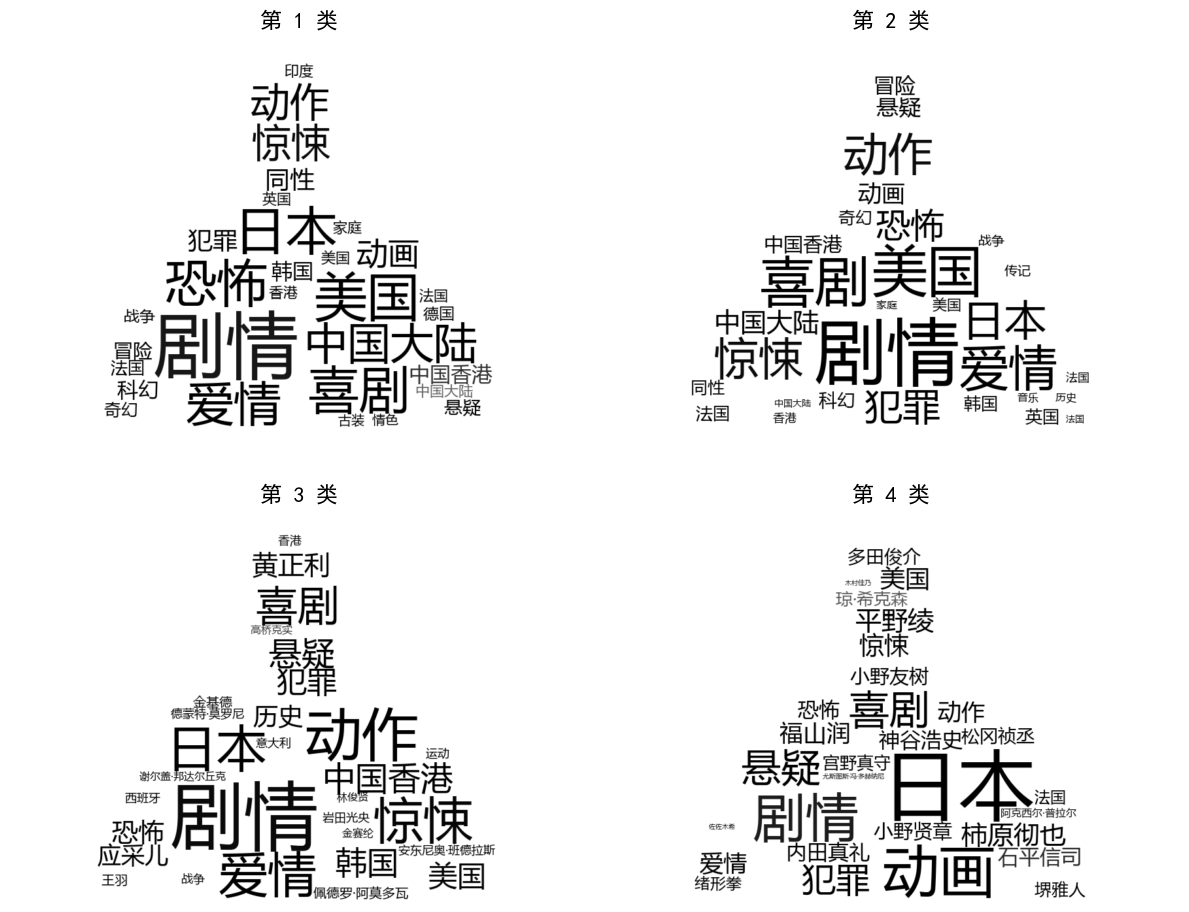

In [55]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 指定中文字体路径
font_path = 'C:\\Windows\\Fonts\\msyh.ttc'  # 修改为你系统中的中文字体路径

# 词云遮罩图（转换为 numpy 数组）
mask_paths = ['mask1.png']  # 你的遮罩图路径
masks = [np.array(Image.open(path)) for path in mask_paths]

# 按照 cluster_id 排序
sorted_clusters = sorted(cluster_top_tags.items(), key=lambda x: x[0])

# 获取聚类数量
num_clusters = len(sorted_clusters)
rows = 2  # 行数
cols = 2  # 列数

# 创建子图
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))

for i, (cluster_id, tag_weights) in enumerate(sorted_clusters):
    ax = axes[i // cols, i % cols]  # 计算当前子图的位置
    wordcloud = WordCloud(
        font_path=font_path,
        mask=masks[i % len(masks)],  # 防止聚类数量大于图片数量
        background_color='white',
        width=400,
        height=400,  # 修改高度以适应新布局
        max_words=200,
        prefer_horizontal=True,
        scale=2
    ).generate_from_frequencies(tag_weights.to_dict())

    ax.imshow(wordcloud.recolor(color_func=ImageColorGenerator(masks[i % len(masks)])), interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'第 {cluster_id + 2} 类', fontsize=16)

# 调整布局
plt.tight_layout()
plt.show()
